In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt


In [2]:
img =cv2.imread('./datasets/Kiara/Bhool Bhulaiyaa 2_ Kiara Advani aka.jpg')
img.shape

(720, 1280, 3)

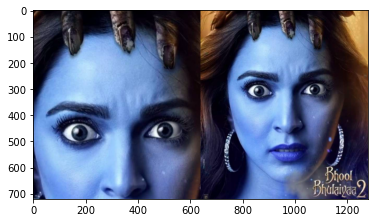

In [3]:
plt.imshow(img)

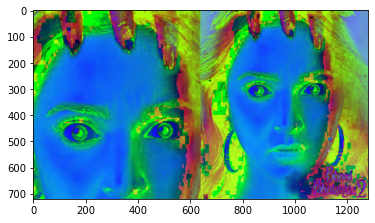

In [4]:
diff = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
diff.shape
diff
plt.imshow(diff)

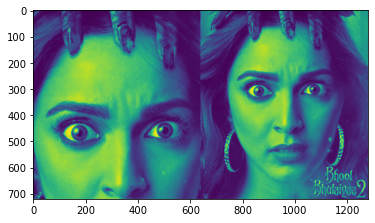

In [5]:
# to black and white 
black_and_white = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(black_and_white)

Line And Edge Feature using to Detect Features -> MOVING WINDOW

##### Face and Image Using Haar Cascsade

In [6]:
face =cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye =cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

# DIRECT CAN CONTINUE TO THE FUNCIOTN 




In [ ]:

faces = face.detectMultiScale(black_and_white, 1.3, 5)
eyes = eye.detectMultiScale(black_and_white, 1.3, 5)
faces

In [ ]:
#eyes

Rectiangle

In [ ]:
(a,b,c,d) = faces[0]

In [ ]:
a,b,c,d

In [ ]:
face_detect = cv2.rectangle(img, (a,b), (a+c, b+d), (255,0,0), 2)    #Length a,b to a+c
plt.imshow(face_detect)

#### Full Analysis on face & Eye Detection 

In [ ]:
for (a,b,c,d) in faces:
    face= cv2.rectangle(img, (a,b), (a+c, b+d), (255,0,0), 2)  # 3d
    face_gray = face[b: b+d, a:a+c]
    face_color = face[b: b+d, a:a+c]
    eyes = eye.detectMultiScale(face_gray)
    for(e_a, e_b, e_c, e_d) in eyes:
        cv2.rectangle(face_color, (e_a,e_b), (e_a+e_c, e_b+e_d), (0,255,0),2)
plt.figure()
plt.imshow(face_detect, cmap='gray')
plt.show()

plt.imshow(face_color, cmap='gray')

In [7]:
def get_croped_image_when_two_eyes_found(image_given):
    img = cv2.imread(image_given)
    black_and_white = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces= face.detectMultiScale(black_and_white,1.3,5)
    for (a,b,c,d) in faces:
        face_gray = black_and_white[b:b+d,a:a+c]
        face_color= img[b:b+d,a:a+c]        
        eyes = eye.detectMultiScale(face_gray)
        if (len(eyes)>=2 and len(eyes)<6):
            return face_color


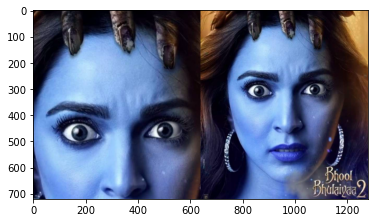

In [8]:
image_scan = cv2.imread('./datasets/Kiara/Bhool Bhulaiyaa 2_ Kiara Advani aka.jpg')
plt.imshow(image_scan)

TypeError: Image data of dtype object cannot be converted to float

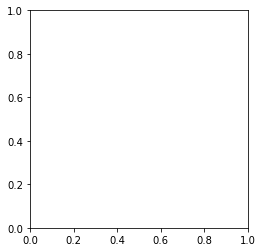

In [10]:
cropped_image = get_croped_image_when_two_eyes_found('./datasets/Kiara/Bhool Bhulaiyaa 2_ Kiara Advani aka.jpg')
plt.imshow(cropped_image)

Till here Practice

# Main processing


### Making different Folders_ For Cropped and Correct face and Eyes images

In [ ]:
def get_croped_image_when_two_eyes_found(image_given):
    img = cv2.imread(image_given)
    black_and_white = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces= face.detectMultiScale(black_and_white,1.3,5)
    for (a,b,c,d) in faces:
        face_gray = black_and_white[b:b+d,a:a+c]
        face_color= img[b:b+d,a:a+c]        
        eyes = eye.detectMultiScale(face_gray)
        if (len(eyes)>=2 and len(eyes)<6):
            return face_color

In [11]:
data_path ='./datasets/'
cropped_data_path= './datasets/cropped'

In [12]:
import os
img_directory = []
for entry in os.scandir(data_path):
    if entry.is_dir():
        img_directory.append(entry.path)

In [13]:
img_directory

['./datasets/tamanna',
 './datasets/sunny',
 './datasets/Kiara',
 './datasets/Me',
 './datasets/Disha',
 './datasets/cropped']

Creating Crop folder and remove if present earlier

In [14]:
import shutil
if os.path.exists(cropped_data_path):
    shutil.rmtree(cropped_data_path)
os.mkdir(cropped_data_path)

# Funcion for processing cropped Images

In [16]:
cropped_img_dirs =[]
person_file_name_dict ={}

#
for img_dir in img_directory:
    count= 1
    persons_name = img_dir.split('/')[-1]
    print(persons_name)
    #initialisation each dict
    person_file_name_dict[persons_name]=[]
    
    # main function 
    for entry in os.scandir(img_dir):
        face_color = get_croped_image_when_two_eyes_found(entry.path)
        if face_color is not None:  # if valid face 
            cropped_folder = cropped_data_path + persons_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print("creating folders......")
                
            cropped_file_name_temp = persons_name + str(count) +".png"
            cropped_file_path_name_temp = cropped_folder+"/"+cropped_file_name_temp
            
            #writting 
            cv2.imwrite(cropped_file_path_name_temp , face_color)
            person_file_name_dict[persons_name].append(cropped_file_path_name_temp)
            count = count +1

tamanna
sunny
Kiara
creating folders......
Me
creating folders......
Disha
creating folders......
cropped
